# Notebook to produce some nice graphs

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd

plt.style.use('classic')

## Numbers from the data 

In [2]:
# From the data: 
data_LorenzPts = np.array([[0, 0.01, 0.60, 3.58], [0.06, 0.63, 2.98, 11.6], [0.15, 0.92, 3.27, 10.3], 
                           [0.03, 0.35, 1.84, 7.42]])

data_LP_popln = pd.read_csv('LorenzAll.csv', sep='\t')
data_LP_byEd = pd.read_csv('LorenzEd.csv', sep='\t')

In [3]:
myDf = data_LP_byEd[data_LP_byEd['myEd']==3]

myDf = myDf[myDf['sumEdW'] > 79.9]

print(myDf)

       yy1  myEd     sumEdW     sumLW
2042   879     3   79.90005  10.28338
2043  1636     3   79.90484  10.28666
2044  3361     3   80.04536  10.38341
2045  1194     3   80.05186  10.38789
2046  2766     3   80.08371  10.41020
...    ...   ...        ...       ...
2716   813     3   99.99979  99.85492
2717  3576     3   99.99983  99.88373
2718  1635     3   99.99990  99.92633
2719  4158     3   99.99994  99.95766
2720  2748     3  100.00000  99.99999

[679 rows x 4 columns]


# Numbers from the model

In [5]:
# From the estimated model with CRRA=2.0, and replacement rates 0.7 and 0.5:
# From file AllResults_CRRA_2.0_R_1.01.txt
model_LorenzPts = np.array([[0.0, 0.0, 0.0652, 2.6826], [0.0503, 1.0127, 3.8309, 11.2704], 
                            [0.3298, 1.5146, 4.0396, 9.8412], [0.0394, 0.6198, 2.518, 8.1916]])

# Figure labels

In [7]:
# Figure labels:
mytitles = ['Dropout (9.3 pct)', 'Highschool (52.7 pct)', 'College (38 pct)', 'Population']
myYticks = [range(0,30,5), range(0,30,5),range(0,30,5),range(0,30,5)]

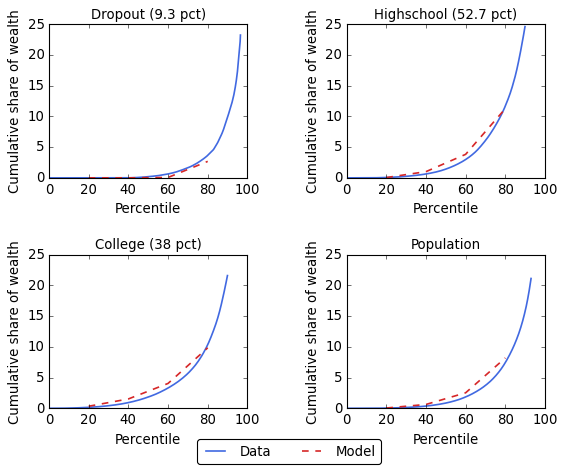

In [8]:
x_axis = np.array([20,40,60,80])

fig = plt.figure()
gs = fig.add_gridspec(2, 2, hspace=.5, wspace=.5)
axs = gs.subplots(sharex=False, sharey=False)

for row in range(2):
    for col in range(2):
        idx = col+row*(row+1)+1
        if idx < 4:
            dfToPlot = data_LP_byEd[data_LP_byEd['myEd']==idx]
            if idx == 1:
                dfToPlot = dfToPlot[dfToPlot['sumEdW'] <= 96.5]
            else:
                dfToPlot = dfToPlot[dfToPlot['sumEdW'] <= 90]
            axs[row,col].plot(dfToPlot['sumEdW'],dfToPlot['sumLW'], color="royalblue",
                              linestyle='solid', linewidth=1.5, label='Data')
        else:
            dfToPlot = data_LP_popln[data_LP_popln['sumNormW'] <= 93]
            axs[row,col].plot(dfToPlot['sumNormW'],dfToPlot['sumLWall'], color="royalblue",
                              linestyle='solid', linewidth=1.5, label='Data')
        axs[row,col].plot(x_axis, model_LorenzPts[col+row*(row+1)], color="tab:red", 
                          linestyle='dashed', linewidth=1.5,label='Model')
        axs[row,col].set_xticks(ticks=[0,20,40,60,80,100])
        axs[row,col].set_yticks(ticks=myYticks[col+row*(row+1)])
        axs[row,col].set_title(mytitles[col+row*(row+1)])
        axs[row,col].title.set_fontsize(12)
        
        if idx == 4:
            handles, labels = axs[row,col].get_legend_handles_labels()

for ax in axs.flat:
    ax.set(xlabel='Percentile', ylabel='Cumulative share of wealth')
    #ax.label_outer()
plt.rc('axes', labelsize=12)

lgd = fig.legend(handles, labels, loc='lower center', ncol=2, fancybox=True, shadow=False, 
          bbox_to_anchor=(0.5, -0.03), fontsize=12)
fig.set_facecolor(color="white")

plt.show()

In [9]:
# Save fig for paper
fig.savefig('LorenzPoints.pdf', facecolor=fig.get_facecolor(), edgecolor='none',
            bbox_extra_artists=(lgd,), bbox_inches='tight')

# Numbers from robustness exercises - need to update

In [5]:
# Robustness case: vary interest rate
model_LorenzPts_CRRA2_R1005 = np.array([[0.0, 0.0, 0.0323, 2.2824], [0.0505, 1.0121, 3.8283, 11.2703], 
                            [0.3366, 1.5285, 4.0468, 9.8034], [0.0351, 0.5486, 2.2288, 7.2706]])
model_LorenzPts_CRRA2_R1015 = np.array([[0.0, 0.0, 0.0678, 2.302], [0.05, 1.0111, 3.8283, 11.2613], 
                            [0.3233, 1.4996, 4.026, 9.8605], [0.0393, 0.6192, 2.5181, 8.1971]])
mylines = [model_LorenzPts_CRRA2_R1005, model_LorenzPts_CRRA2_R1015]
mylabels = ['R = 0.5 %', 'R = 1.5 %']

In [10]:
# Robustness case: vary risk aversion
model_LorenzPts_CRRA1_R101 = np.array([[], [], [], []])
model_LorenzPts_CRRA3_R101 = np.array([[0.0, 0.0, 0.0429, 2.3392], [0.07, 1.0657, 3.8691, 11.24],
                                        [0.3394, 1.5199, 4.0304, 9.8616], [0.0435, 0.5945, 2.3627, 7.6989]])
mylines = [model_LorenzPts_CRRA3_R101, model_LorenzPts_CRRA3_R101]
mylabels = ['CRRA = 1.0', 'CRRA = 3.0']

# Figure titles - robustness graph

In [11]:
# Figure labels:
mytitles = ['Dropout (9.3 pct)', 'Highschool (52.7 pct)', 'College (38 pct)', 'Population']
myYticks = [range(0,30,5), range(0,30,5),range(0,30,5),range(0,30,5)]
x_axis = np.array([20,40,60,80])

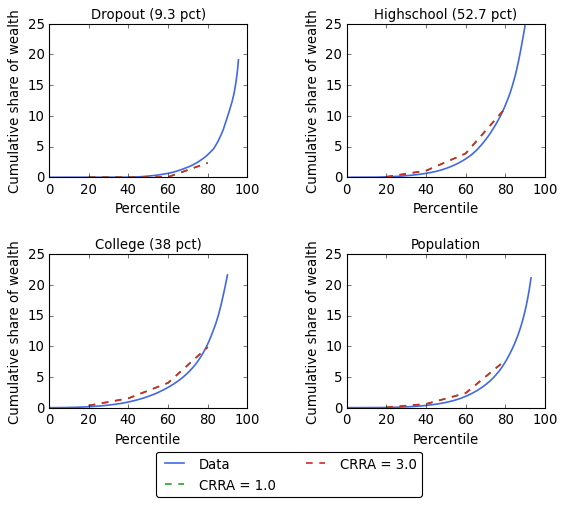

In [12]:
fig = plt.figure()
gs = fig.add_gridspec(2, 2, hspace=.5, wspace=.5)
axs = gs.subplots(sharex=False, sharey=False)

for row in range(2):
    for col in range(2):
        idx = col+row*(row+1)+1
        if idx < 4:
            dfToPlot = data_LP_byEd[data_LP_byEd['myEd']==idx]
            if idx == 1:
                dfToPlot = dfToPlot[dfToPlot['sumEdW'] <= 96]
            else:
                dfToPlot = dfToPlot[dfToPlot['sumEdW'] <= 90]    
            axs[row,col].plot(dfToPlot['sumEdW'],dfToPlot['sumLW'], color="royalblue",
                              linestyle='solid', linewidth=1.5, label='Data')
        else:
            dfToPlot = data_LP_popln[data_LP_popln['sumNormW'] <= 93]
            axs[row,col].plot(dfToPlot['sumNormW'],dfToPlot['sumLWall'], color="royalblue",
                              linestyle='solid', linewidth=1.5, label='Data')
        axs[row,col].plot(x_axis, mylines[0][col+row*(row+1)], color="tab:green", 
                          linestyle='dashed', linewidth=1.5,label=mylabels[0])
        axs[row,col].plot(x_axis, mylines[1][col+row*(row+1)], color="tab:red", 
                          linestyle='dashed', linewidth=1.5,label=mylabels[1])
        axs[row,col].set_xticks(ticks=[0,20,40,60,80,100])
        axs[row,col].set_yticks(ticks=myYticks[col+row*(row+1)])
        axs[row,col].set_title(mytitles[col+row*(row+1)])
        axs[row,col].title.set_fontsize(12)
        
        if idx == 4:
            handles, labels = axs[row,col].get_legend_handles_labels()

for ax in axs.flat:
    ax.set(xlabel='Percentile', ylabel='Cumulative share of wealth')
    #ax.label_outer()
plt.rc('axes', labelsize=12)

lgd = fig.legend(handles, labels, loc='lower center', ncol=2, fancybox=True, shadow=False, 
          bbox_to_anchor=(0.5, -0.10), fontsize=12)
fig.set_facecolor(color="white")

plt.show()

In [13]:
# Save robustness fig
fig.savefig('LorenzPoints_robustness_R.pdf', facecolor=fig.get_facecolor(), edgecolor='none',
            bbox_extra_artists=(lgd,), bbox_inches='tight')

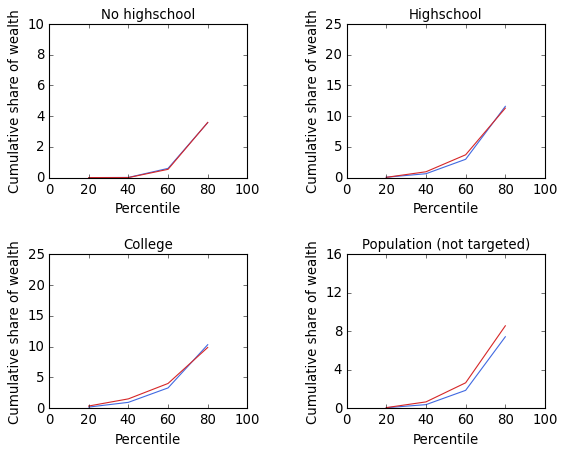

In [8]:
x_axis = np.array([20,40,60,80])

fig = plt.figure()
gs = fig.add_gridspec(2, 2, hspace=.5, wspace=.5)
axs = gs.subplots(sharex=False, sharey=False)

for row in range(2):
    for col in range(2):
        axs[row,col].plot(x_axis, data_LorenzPts[col+row*(row+1)], color="royalblue")
        axs[row,col].plot(x_axis, model_LorenzPts[col+row*(row+1)], color="tab:red")
        axs[row,col].set_xticks(ticks=[0,20,40,60,80,100])
        axs[row,col].set_yticks(ticks=myYticks[col+row*(row+1)])
        axs[row,col].set_title(mylabels[col+row*(row+1)])
        axs[row,col].title.set_fontsize(12)
fig.set_facecolor(color="white")

for ax in axs.flat:
    ax.set(xlabel='Percentile', ylabel='Cumulative share of wealth')
    #ax.label_outer()
plt.rc('axes', labelsize=12)
    
plt.show()